# Small Molecule Docking Predictions using Diffdock, Equibind, and GNINA


Run the following cells, in order, to complete a demonstration workflow using FastQC on PLEX.

## Install PLEX
Run the following command.

In [ ]:
!pip install PlexLabExchange

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 22.1 MB/s eta 0:00:00


Import the Python `OS` package. Then, create a new working directory named `project` and set the variable `dir_path` equal to it's location.

In [ ]:
import os

cwd = os.getcwd()
!mkdir project

dir_path = f"{cwd}/project"

## Generating a Quality Control Report for HTS Data
Let's download a sample high-throughput sequencing (HTS) file containing unaligned DNA sequencing reads, formatted as a `.fastq` file.

More details about the `.fastq` file format can be found here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2847217/

In [ ]:
!pip install requests

import requests

# Create a function to download and parse input files for PLEX
def download_file(url, directory, filename=None):
    local_filename = filename if filename else url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(os.path.join(directory, local_filename), 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    return local_filename

# Download and parse test data
url = 'https://raw.githubusercontent.com/labdao/plex/main/testdata/sequencing/fastqc/testdata.fastq'
fastq_filepath = download_file(url, dir_path)

# Download and parse the FastQC tool config file for PLEX
tool_url = "https://raw.githubusercontent.com/labdao/plex/main/tools/fastqc/fastqc.json"
tool_path = download_file(tool_url, dir_path)

Now that the `.fastq` file has been downloaded, we can run our analysis on the sequencing reads it contains using [FastQC](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/).

In [ ]:
from plex import CoreTools, plex_create

# Create the IO file specifying the job details
initial_io_cid = plex_create(f"{dir_path}/fastqc.json", f"{dir_path}")

Plex version (v0.8.3) up to date.
Temporary directory created: /tmp/3d3832a1-433a-4b19-a75d-a00cf11025d53543615840
Reading tool config:  /content/project/fastqc.json
Creating IO entries from input directory:  /content/project
Initialized IO file at:  /tmp/3d3832a1-433a-4b19-a75d-a00cf11025d53543615840/io.json
Initial IO JSON file CID:  QmeLbEWFvY9xCF2CmWqntE5STpiW4DwEoCpLWXFd9k9tQF


In [ ]:
from plex import plex_run

# Run the job
completed_io_cid, completed_io_filepath = plex_run(initial_io_cid, dir_path)

Plex version (v0.8.3) up to date.
Created working directory:  /content/project/f56df917-8d7e-489e-89d4-9a7a2f3e6ded
Initialized IO file at:  /content/project/f56df917-8d7e-489e-89d4-9a7a2f3e6ded/io.json
Processing IO Entries
Starting to process IO entry 0 
Job running...
Bacalhau job id: 68fe5650-ff86-42cc-aa2d-92d75e3410ab 

Computing default go-libp2p Resource Manager limits based on:
    - 'Swarm.ResourceMgr.MaxMemory': "6.8 GB"
    - 'Swarm.ResourceMgr.MaxFileDescriptors': 524288

Applying any user-supplied overrides on top.
Run 'ipfs swarm limit all' to see the resulting limits.

Success processing IO entry 0 
Finished processing, results written to /content/project/f56df917-8d7e-489e-89d4-9a7a2f3e6ded/io.json
Completed IO JSON CID: QmQfZ2dE1nbJcACJTWdurvzoqPubeChsd5GoinLKnF8VbH
2023/07/18 17:50:31 failed to sufficiently increase receive buffer size (was: 208 kiB, wanted: 2048 kiB, got: 416 kiB). See https://github.com/quic-go/quic-go/wiki/UDP-Receive-Buffer-Size for details.


So far, we've run FastQC and generated a quality control report in the form of an `.html` file.

We also generated a `.zip` file containing the images and source data used to create the report.

Open the `/project` folder and look for a subdirectory matching the job ID written to the console log above.

Download the `.html` and `.zip` files. Then, open the `.html` file using any web browser.


---


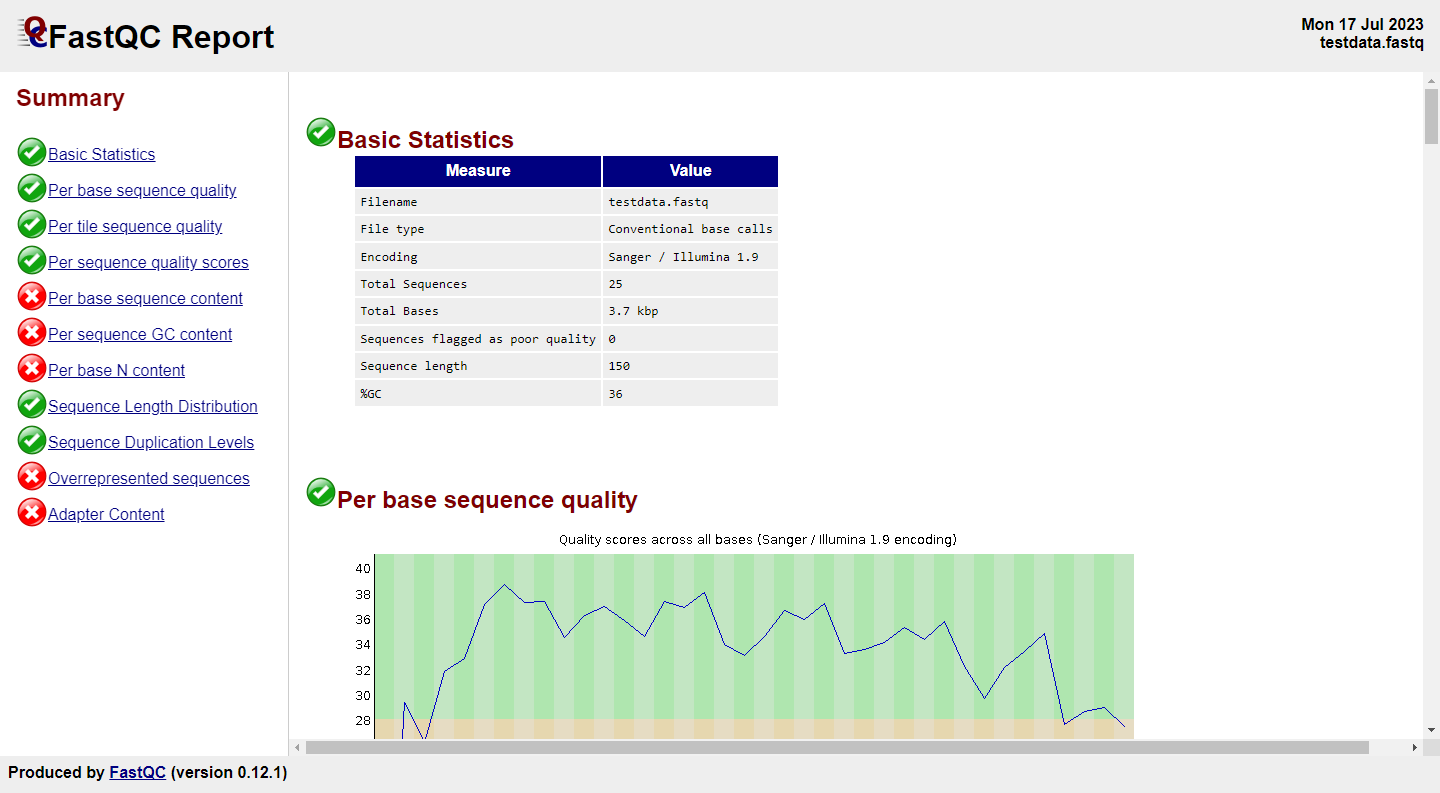

We've just completed a basic HTS quality control run starting from the raw sequencing file.

If you'd like to investigate the results further, you can explore the CID of the IO JSON, which points to all input and output data from running FastQC.

## Optional: Generating An On-Chain "Proof of Science" NFT

Finally, we can demonstrate the benefits of using distributed storage and compute by producing an on-chain artefact. The current collection of tokens can be viewed on the current [NFT contract deployed on opensea](https://testnets.opensea.io/collection/unidentified-contract-23817).

In [ ]:
from plex import plex_mint

os.environ["RECIPIENT_WALLET"] = "0x66CD14267fb5a1609496CdC37eB55E6FE3f59C75" # enter your wallet address 0x64B...
os.environ["AUTOTASK_WEBHOOK"] = "https://api.defender.openzeppelin.com/autotasks/e15b3f39-28f8-4d30-9bf3-5d569bdf2e78/runs/webhook/8315d17c-c493-4d04-a257-79209f95bb64/2gmqi9SRRAQMoy1SRdktai"

nft_cid = plex_mint(completed_io_cid)

Plex version (v0.8.3) up to date.
Preparing NFT metadata...
Uploading NFT metadata to IPFS...
NFT metadata uploaded to IPFS: ipfs://QmTzcGiNS5zAeNRKoUuyQVLbvubP8khBbS3LpUF4oXWZdA
Triggering minting process via Defender Autotask...
🌱🌱🌱🌱🌱
Minting process successful.
Thank you for making science more reproducible, open, and collaborative!
You can view your ProofOfScience NFT at https://testnets.opensea.io/.
🌱🌱🌱🌱🌱
